First we begin by installing the nba_api in order to manipulate the dataset


In [3]:
pip install nba_api


     |████████████████████████████████| 242 kB 548 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [13]:
from nba_api.stats.endpoints import leagueleaders
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np

df = leagueleaders.LeagueLeaders().league_leaders.get_data_frame()



In [14]:
print(df.head())

   PLAYER_ID  RANK            PLAYER TEAM  GP  MIN  FGM  FGA  FG_PCT  FG3M  \
0     201939     1     Stephen Curry  GSW   2   74   21   46   0.457    10   
1     203897     1       Zach LaVine  CHI   2   67   22   36   0.611     7   
2    1627734     3  Domantas Sabonis  IND   2   82   23   32   0.719     6   
3     201142     3      Kevin Durant  BKN   2   67   22   45   0.489     4   
4     203944     5     Julius Randle  NYK   2   76   21   43   0.488     5   

   ...  REB  AST  STL  BLK  TOV  PF  PTS  EFF  AST_TOV  STL_TOV  
0  ...   20   11    4    1   10   3   66   67     1.10     0.40  
1  ...   13    9    1    2    8   2   66   68     1.13     0.13  
2  ...   24    9    0    1    9   7   61   74     1.00     0.00  
3  ...   26   16    1    3    3   3   61   78     5.33     0.33  
4  ...   18   16    2    3   11   7   56   61     1.46     0.18  

[5 rows x 27 columns]


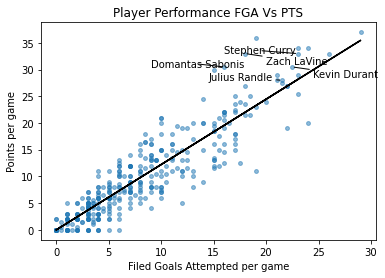

In [16]:
fga = df.FGA/df.GP
ppg = df.PTS/df.GP

x = np.array(fga).reshape(-1,1)
y = np.array(ppg).reshape(-1,1)

model = linear_model.LinearRegression()
model.fit(x,y)

predicted_y = model.predict(x)

plt.scatter(x,y,s=15,alpha=.5)
plt.plot(x,predicted_y,color='black')

for i in range(0,5):
    #Player names
    if(i%2 == 0):
        plt.annotate(df.PLAYER[i],
            (x[i], y[i]),
            (x[i]-7,y[i]),
            arrowprops=dict(arrowstyle='-'))
    else:
        plt.annotate(df.PLAYER[i],
                    (x[i],y[i]),
                    (x[i]+2,y[i]-2),
                    arrowprops=dict(arrowstyle='-'))

        
plt.title('Player Performance FGA Vs PTS')
plt.xlabel('Filed Goals Attempted per game')
plt.ylabel('Points per game')
plt.show()
        